In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)
import numpy as np
import pandas as pd
import PhaseRetrieval
import simple_gaussian_data_generator
from skimage import data
from skimage import color, img_as_float
from skimage.feature import register_translation
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# camera = img_as_float(color.rgb2gray(data.camera()))
# mags = np.abs(np.fft.fftn(camera))
# chio = PhaseRetrieval.PhaseRetrieval(mags)
# chio.CHIO(n_iter=5000, prog_bar=True)
# plt.imshow(chio.real_space_guess)

2 Gaussians
[====================] 250/250 steps  Success


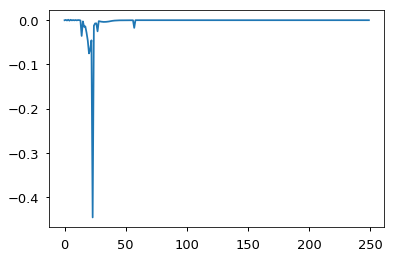

[20 21 23]


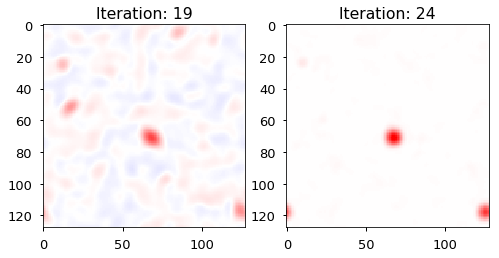

In [2]:
# guess1 = simple_gaussian_data_generator.normalize_image(simple_gaussian_data_generator.simple_gaussians(50, 10))
n = np.random.randint(1, 20)
print "%d Gaussians" %n
img = simple_gaussian_data_generator.normalize_image(simple_gaussian_data_generator.simple_gaussians(n, 10))
mags = np.abs(np.fft.fftn(img))

chio = PhaseRetrieval.PhaseRetrieval(mags)
chio.CHIO(n_iter=250, prog_bar=True)
chio.calc_real_space_error(img, plot=False)

if chio.real_space_err_track[-1] < 0.5:
    print "Success"
    plt.figure()
    plt.plot(np.diff(chio.real_space_err_track))
    plt.show()
    
    diffs = np.where(np.diff(chio.real_space_err_track) < -0.05)[0]
    print diffs
    plt.figure()
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(chio.ndm_track[diffs[0]-1], cmap="bwr", vmin=-1, vmax=1)
    ax[0].set_title("Iteration: %d" %(diffs[0]-1))
    ax[1].imshow(chio.rs_track[diffs[-1]+1], cmap="bwr", vmin=-1, vmax=1)
    ax[1].set_title("Iteration: %d" %(diffs[-1]+1))
    plt.show()

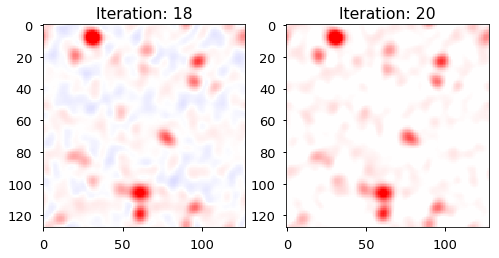

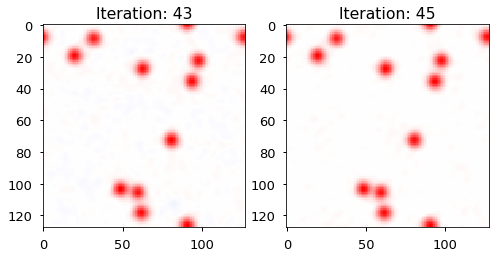

In [21]:
for i in range(len(diffs)):
    plt.figure()
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(chio.ndm_track[diffs[i]-1], cmap="bwr", vmin=-1, vmax=1)
    ax[0].set_title("Iteration: %d" %(diffs[i]-1))
    ax[1].imshow(chio.rs_track[diffs[i]+1], cmap="bwr", vmin=-1, vmax=1)
    ax[1].set_title("Iteration: %d" %(diffs[i]+1))
    plt.show()

In [200]:
# def align(img, ref):
#     errs = np.zeros(4)
#     for i in range(4):
#         shift, errs[i], blarg = register_translation(ref, np.rot90(img, k=i))
#     n_rot = np.argmin(errs)
#     shift, error, blargh= register_translation(ref,np.rot90(img, k=n_rot))
#     fixed = np.roll(np.rot90(img, k=n_rot),shift.astype(np.int),axis=(0,1))
#     return fixed
# try:
#     os.mkdir("movie2")
# except:
#     print "Already made"
# for i in range(201):
#     plt.figure(figsize=(8, 8))
#     plt.title("CHIO -- Iteration: %d" %i)
#     plt.imshow(align(chio.rs_track[i], img), cmap="gray_r")
#     plt.savefig("movie2/img%04d.png" %i)
#     plt.close()

In [165]:
# %%bash
# ffmpeg -i movie2/img%04d.png -vcodec libx264 -pix_fmt yuv420p movie_shiftingGaussians2.mp4

In [168]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def PR_movie(pr, x):
    plt.title("Iteration: %d" %x)
    plt.imshow(pr.rs_track[x], cmap="gray_r")
    return

In [321]:
x = interact(PR_movie, x=widgets.IntSlider(min=0,max=len(chio.rs_track)-1,step=1,value=0), pr=fixed(chio))

A Jupyter Widget

In [4]:
def generate_data(num, size=1000):
    dataset = np.zeros((size, 128, 128))
    ns = np.zeros(size, dtype=int)
    errs = np.zeros(size)
    X = []
    Y = []
    for i in range(size):
        n = np.random.randint(1, 25) # numbers from 1-20 (inclusive)
        ns[i] = n
        dataset[i] = simple_gaussian_data_generator.normalize_image(simple_gaussian_data_generator.simple_gaussians(n, 10))
    np.save("datasets/dataset%04d.npy" %num, dataset)
    np.save("datasets/numbers%04d.npy" %num, ns)
    return

def make_datasets(n):
    for i in range(n):
        print i
        generate_data(i, 1000)
    return

make_datasets(10)

0
1
2
3
4
5
6
7
8
9


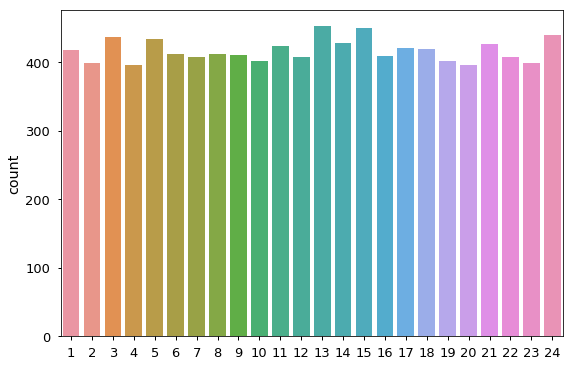

In [4]:
# Confirm uniform, unbiased training data
plt.figure(figsize=(9, 6))
sns.countplot(ns)

In [ ]:
success = []
for i, img in enumerate(dataset):
    if i%250==0:
        print "Iteration %d" %i
    
    mags = np.abs(np.fft.fftn(img))
    chio = PhaseRetrieval.PhaseRetrieval(mags)
    chio.CHIO(n_iter=250, prog_bar=True)
    chio.calc_real_space_error(img, plot=False)
    errs[i] = chio.real_space_err_track[-1]
    if chio.real_space_err_track[-1] < 0.5:
        diffs = np.where(np.diff(chio.real_space_err_track) < -0.05)[0]
        #for diff in diffs:
        X.append(chio.ndm_track[diffs[0]-1])
        Y.append(chio.rs_track[diffs[-1]+1])
        success.append(i)
    del chio

Iteration 0
[====================] 250/250 steps  Iteration 250
[====================] 250/250 steps  Iteration 500
[====================] 250/250 steps  Iteration 750
[====================] 250/250 steps  Iteration 1000
[====================] 250/250 steps  Iteration 1250
[====================] 250/250 steps  Iteration 1500
[====================] 250/250 steps  Iteration 1750
[====================] 250/250 steps  Iteration 2000
[==========          ] 125/250 steps  

In [ ]:
np.save("trainingX.npy", X)
np.save("trainingY.npy", Y)
np.save("successes.npy", success)
np.save("errors.npy", errs)

# How often do things work?
df = pd.DataFrame({"N":ns, "Error":errs})
df["Success"] = df["Error"] < 0.2

In [ ]:
g = sns.factorplot(data=df, x="N", hue="Success", kind="count", size=4, aspect=2)

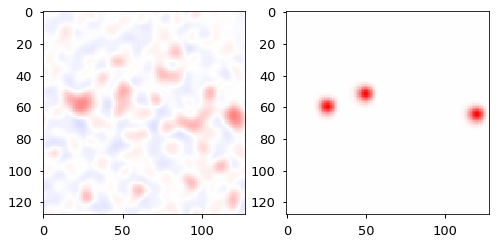

In [74]:
# Randomly sample a pair of training images
plt.figure()
ind = np.random.randint(len(X))
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(X[ind].reshape(128, 128), cmap="bwr", vmin=-1, vmax=1)
ax[1].imshow(Y[ind].reshape(128, 128), cmap="bwr", vmin=-1, vmax=1)
plt.show()

In [21]:
np.array_equal(X, Y)

True

In [17]:
X = np.array(X).reshape(-1, 128, 128, 1)
Y = np.array(Y).reshape(-1, 128, 128, 1)

In [46]:
# Save data
df.to_csv("trainingdata.csv")


(579, 128, 128, 1)

In [9]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.optimizers import RMSprop
import keras
# from keras.layers import Input
from keras.layers.core import Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
# from keras.models import Model

In [12]:
X = np.load("X.npy")
Y = np.load("Y.npy")
dataset = np.load("dataset.npy")
df = pd.read_csv("trainingdata.csv")

In [4]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

In [15]:
img_input = Input(shape=(128, 128, 1))
x = img_input
    
# Encoder
x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
    
x = Conv2D(128, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
    
x = Conv2D(256, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
    
x = Conv2D(512, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
    
# Decoder
x = Conv2D(512, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
    
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(256, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
   
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(128, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
    
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
    
x = Conv2D(1, (1, 1), padding="same")(x)
x = Activation("relu")(x)
segnet = Model(img_input, x)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
segnet.compile(optimizer=optimizer, loss="mean_squared_error")
segnet.summary()
# model = Sequential()

# # encoding layers
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))

# model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
# print model.summary()

# # Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(optimizer=optimizer , loss = "mean_squared_error")
# model.summary()

# input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format

# x = Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(128, 128, 1))
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# encoded = Dropout(0.25)

# # at this point the representation is (7, 7, 32)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')
# autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization_27 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation_28 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_28 (Batc (None, 64, 64, 128)       512       
__________

In [23]:
segnet.fit(X, Y, epochs=1, batch_size=64, validation_data=(X, Y))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
 128/1000 [==>...........................] - ETA: 12:48 - loss: 1.2233

KeyboardInterrupt: 

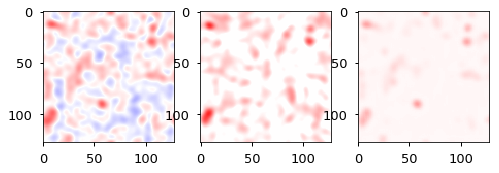

In [34]:
plt.figure()
ind = np.random.randint(len(X))
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
ax[0].imshow(X[ind].reshape(128, 128), cmap="bwr", vmin=-1, vmax=1)
ax[1].imshow(Y[ind].reshape(128, 128), cmap="bwr", vmin=-1, vmax=1)
ax[2].imshow(model.predict(X[ind].reshape(1, 128, 128, 1)).reshape(128, 128), cmap="bwr", vmin=-1, vmax=1)
plt.show()
#plt.imshow(X[0].reshape(128, 128))

In [20]:
test = autoencoder.predict(X[0].reshape(1, 128, 128, 1)).reshape(128, 128)

NameError: name 'autoencoder' is not defined

In [612]:
a = 0.4
b=0.7
freq1=0.95
freq2=0.5
def nn_update(ndm,last,step_n):
    gamma = np.real(ndm)>a*last 
    delta = (0<np.real(ndm))*(~gamma)
    negatives = ~(gamma+delta)
    if step_n < 10:
        return (gamma*np.real(ndm) + delta*(np.real(last)-((1-a)/a)*np.real(ndm)) + (np.real(last) - b*np.real(ndm))*negatives)
    elif step_n < 100:
        if np.random.rand() < freq2:
            return autoencoder.predict(ndm.reshape(1, 128, 128, 1)).reshape(128, 128)
        else:
            if np.random.rand() < freq1:
                return (gamma*np.real(ndm) + delta*(np.real(last)-((1-a)/a)*np.real(ndm)) + (np.real(last) - b*np.real(ndm))*negatives)
            else:
                return (gamma*np.real(ndm))
    else:
        if np.random.rand() < freq1:
            return (gamma*np.real(ndm) + delta*(np.real(last)-((1-a)/a)*np.real(ndm)) + (np.real(last) - b*np.real(ndm))*negatives)
        else:
            return (gamma*np.real(ndm))

15 Gaussians
[====================] 500/500 steps  

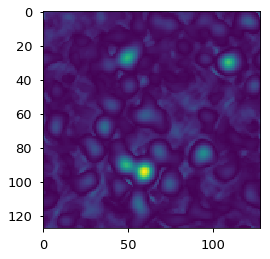

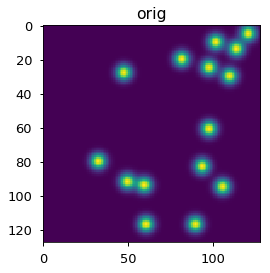

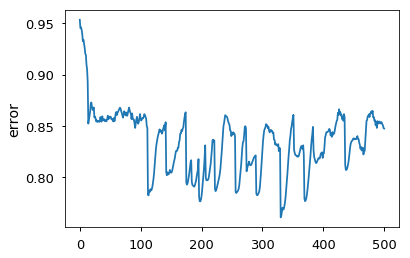

In [650]:
n = np.random.randint(15, 20)
print "%d Gaussians" %n
img = simple_gaussian_data_generator.normalize_image(simple_gaussian_data_generator.simple_gaussians(n, 10))
mags = np.abs(np.fft.fftn(img))
custom = PhaseRetrieval.PhaseRetrieval(mags)
custom.iterate(nn_update, 500, prog_bar=True)
plt.figure()
custom.calc_real_space_error(img)

'numbers0004.npy'